In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('Housing.csv')

In [3]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df['mainroad']=df['mainroad'].map({'yes':1,'no':0})
df['guestroom']=df['guestroom'].map({'yes':1,'no':0})
df['basement']=df['basement'].map({'yes':1,'no':0})
df['hotwaterheating']=df['hotwaterheating'].map({'yes':1,'no':0})
df['airconditioning']=df['airconditioning'].map({'yes':1,'no':0})
df['prefarea']=df['prefarea'].map({'yes':1,'no':0})


In [5]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [6]:
df['furnishingstatus']=df['furnishingstatus'].map({'furnished':2,'semi-furnished':1,'unfurnished':0})

In [7]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


<Axes: >

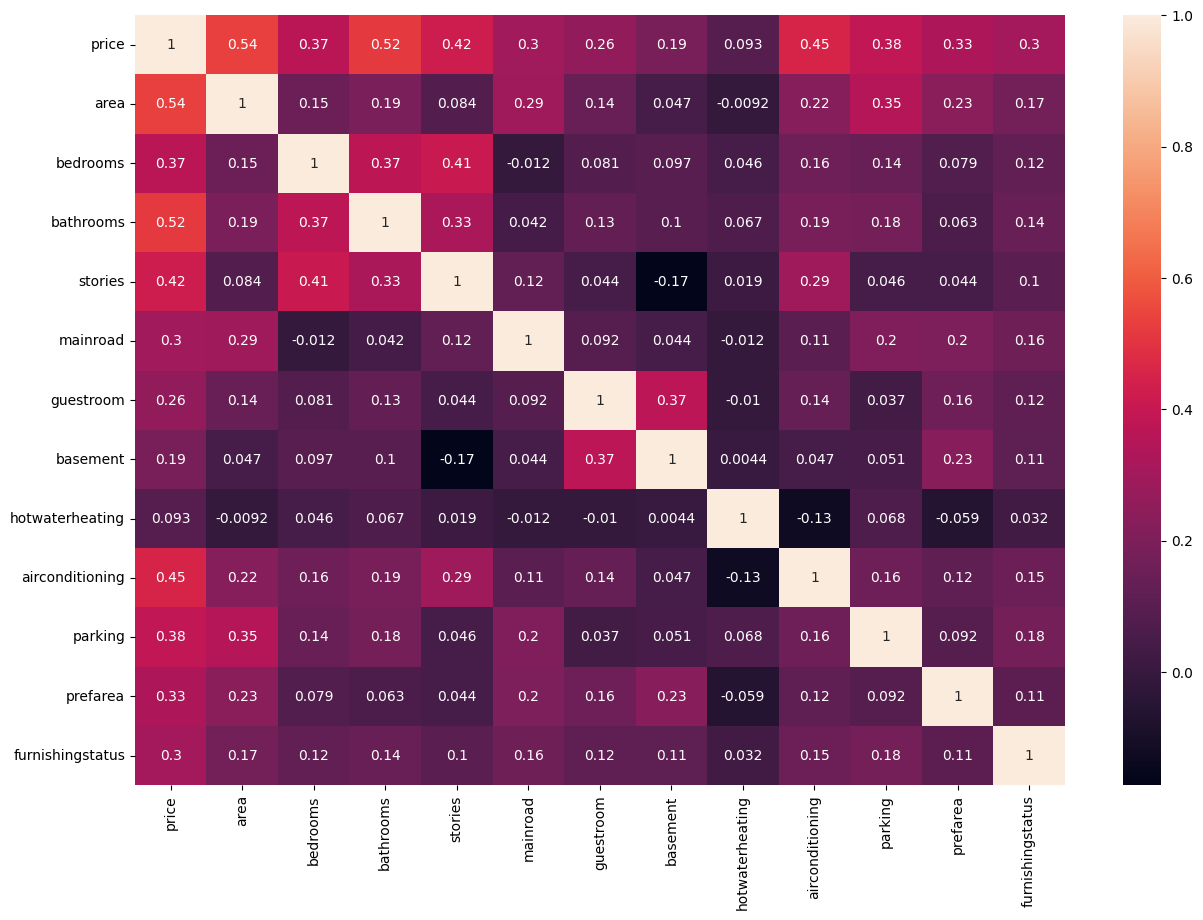

In [14]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,ax=ax)

In [15]:
df.drop(["basement","guestroom","hotwaterheating"],axis=1,inplace=True)

In [40]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,airconditioning,parking,prefarea,furnishingstatus
0,13300000,1.045766,4,2,3,1,1,2,1,2
1,12250000,1.755397,4,4,4,1,1,3,0,2
2,12250000,2.216196,3,2,2,1,0,2,1,1
3,12215000,1.082630,4,2,2,1,1,3,1,2
4,11410000,1.045766,4,1,2,1,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...
540,1820000,-0.990968,2,1,1,1,0,2,0,0
541,1767150,-1.267448,3,1,1,0,0,0,0,1
542,1750000,-0.705273,2,1,1,1,0,0,0,0
543,1750000,-1.032440,3,1,1,0,0,0,0,2


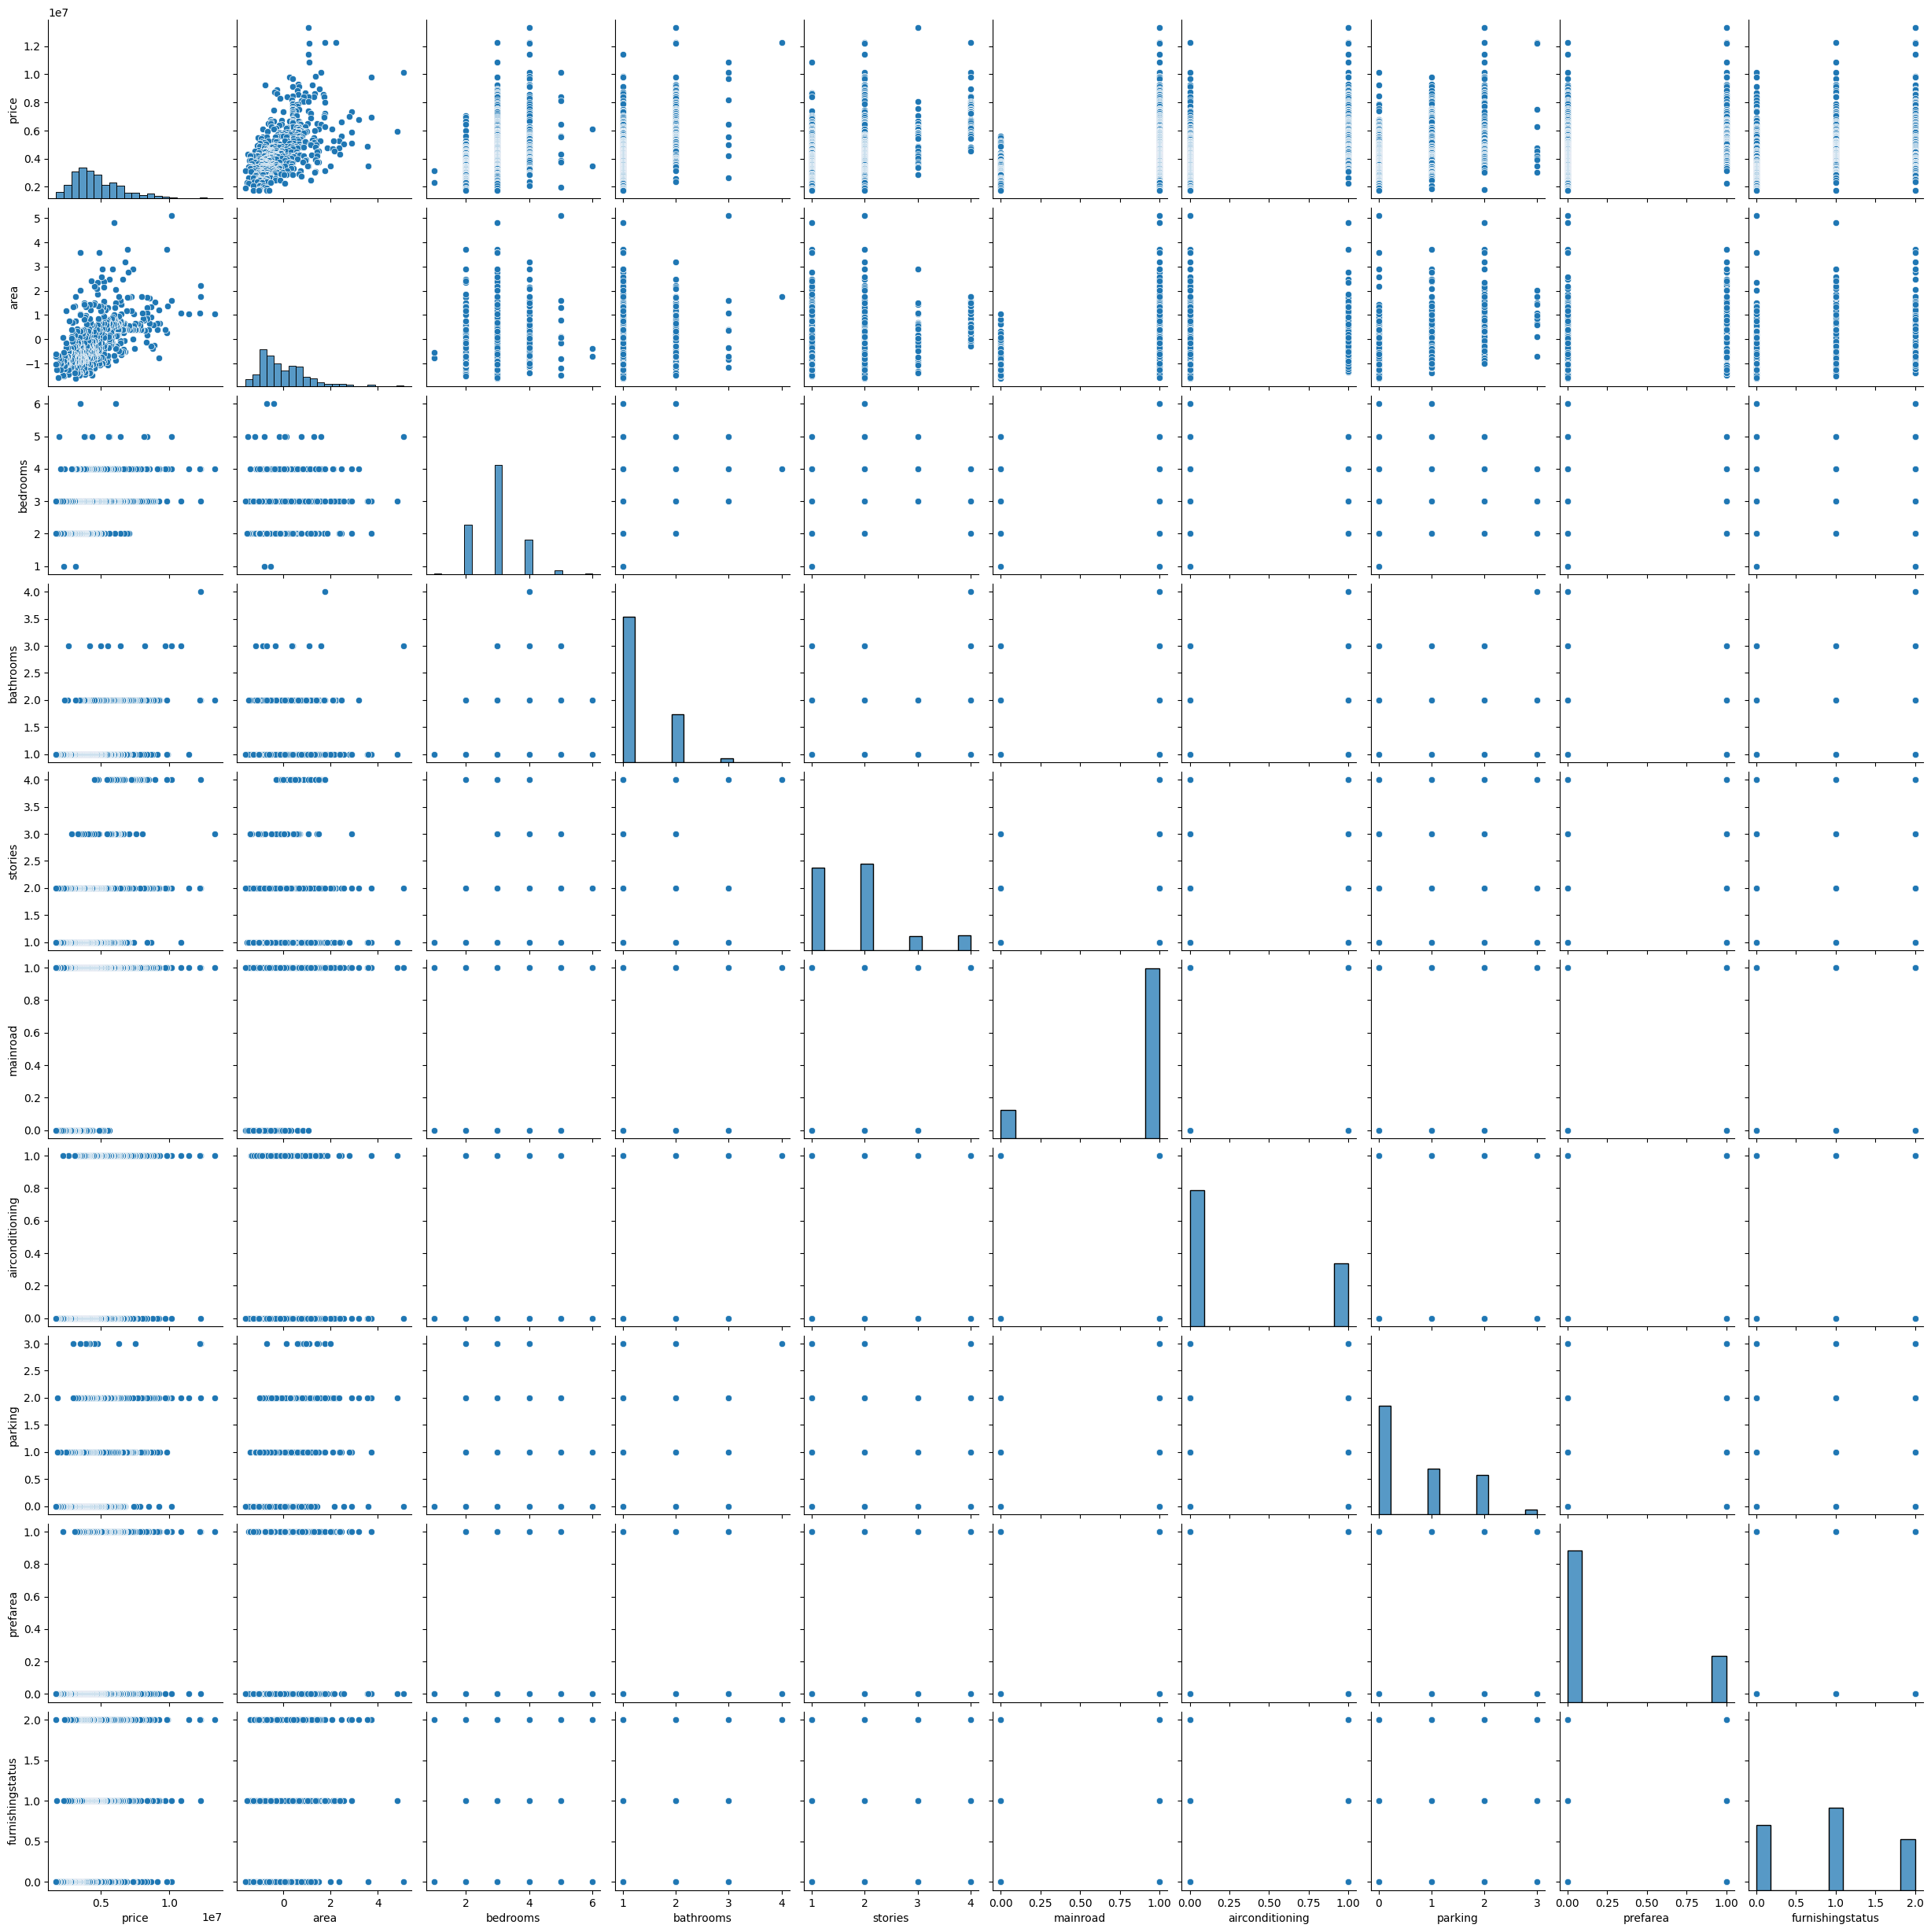

In [44]:
sns.pairplot(df)

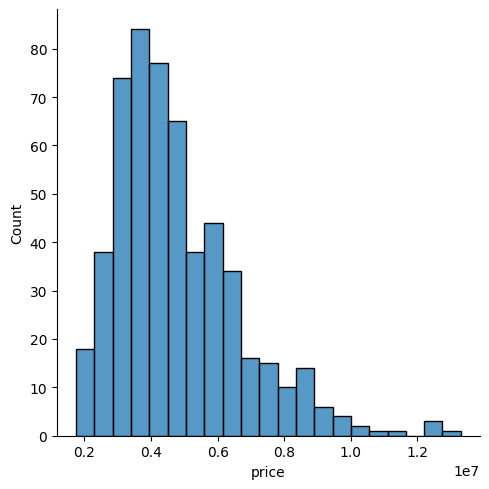

In [45]:
sns.displot(df['price'])

<Axes: xlabel='mainroad', ylabel='price'>

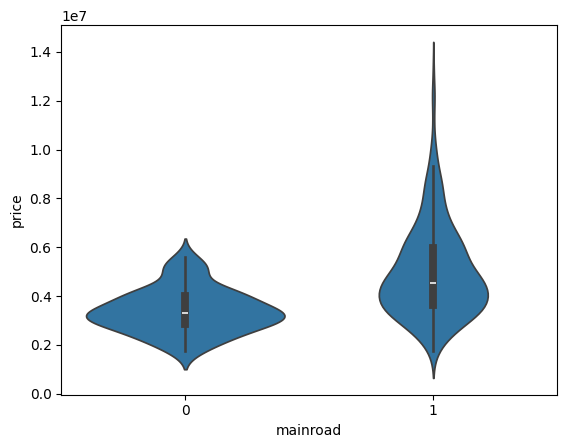

In [46]:
sns.violinplot(x='mainroad',y='price',data=df)

In [37]:
df.area.mean()
df.area.std()   

2170.141022508803

In [39]:
df.area=df.area.apply(lambda x:(x-df.area.mean())/df.area.std())

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [41]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(["price"],axis=1),df["price"],test_size=0.2,random_state=42)

In [42]:
lr=LinearRegression(n_jobs=-1)

In [34]:
x_train 

array([[ 3.84168192e-01],
       [ 9.29180700e-01],
       [-6.07754573e-01],
       [-1.15549214e+00],
       [-6.37730261e-01],
       [-6.54671275e-02],
       [-5.92312552e-01],
       [-3.54914395e-02],
       [-8.96611202e-01],
       [ 3.93251733e-01],
       [-9.23861828e-01],
       [ 1.15626924e+00],
       [ 8.38345282e-01],
       [-7.19482137e-01],
       [-9.78363078e-01],
       [ 5.88547882e-01],
       [-1.25086933e+00],
       [ 6.62442286e-02],
       [ 1.03091637e+00],
       [ 3.15010667e+00],
       [ 9.56431325e-01],
       [-9.78363078e-01],
       [ 2.08265196e-02],
       [ 1.47419321e+00],
       [ 6.22611164e-01],
       [-6.83147970e-01],
       [-6.89960626e-01],
       [-5.24185988e-01],
       [-2.51679734e-01],
       [ 2.20664439e-01],
       [-7.42190992e-01],
       [-1.50702521e+00],
       [-9.10236515e-01],
       [ 2.38831523e-01],
       [-1.36668449e+00],
       [ 1.33794008e+00],
       [-5.55978385e-01],
       [ 5.74922569e-01],
       [-4.6

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train.area.values.reshape(-1,1))
x_test=scaler.transform(x_test.area.values.reshape(-1,1))


In [43]:
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.627562123779714

In [30]:
x_train


array([[ 0.38416819,  0.05527092,  1.53917323, ...,  0.36795665,
        -0.55262032,  1.40940148],
       [ 0.9291807 ,  0.05527092,  1.53917323, ...,  2.70998729,
        -0.55262032,  0.07931697],
       [-0.60775457, -1.28351359, -0.5579503 , ...,  1.53897197,
        -0.55262032,  1.40940148],
       ...,
       [-0.29709744,  0.05527092,  1.53917323, ...,  0.36795665,
        -0.55262032,  1.40940148],
       [-0.5060189 , -1.28351359, -0.5579503 , ..., -0.80305867,
        -0.55262032, -1.25076755],
       [ 0.15707965,  0.05527092,  1.53917323, ...,  0.36795665,
        -0.55262032,  0.07931697]])

In [47]:
import pickle
pickle.dump(lr,open('model.pkl','wb'))


In [48]:
y_pred=lr.predict(x_test)

In [51]:
lr.coef_

array([ 510769.7016621 ,  121125.27876289, 1160038.94164004,
        339125.89222486,  381646.55252844,  801933.57287232,
        225973.86993452,  728196.76403556,  259393.09818375])

<Axes: xlabel='price'>

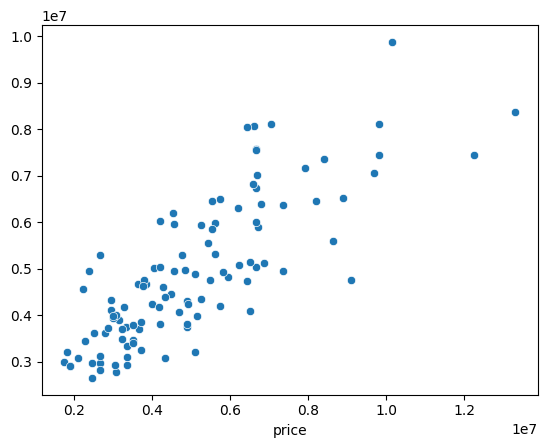

In [55]:
sns.scatterplot(x=y_test,y=y_pred)



In [59]:
residuals=y_test-y_pred


<Axes: ylabel='price'>

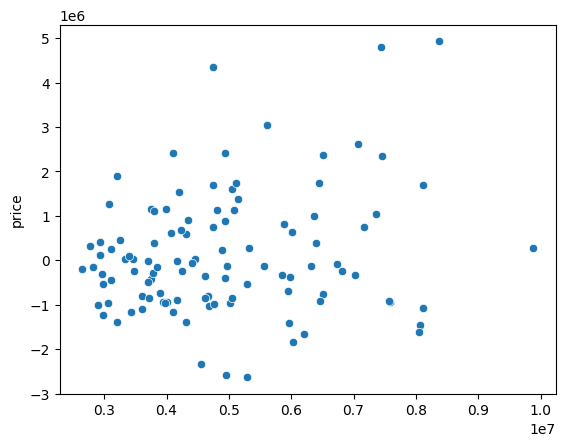

In [60]:
sns.scatterplot(x=y_pred,y=residuals)


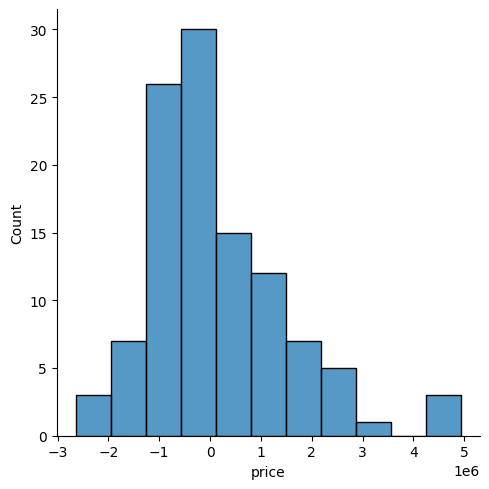

In [61]:
sns.displot(residuals)

<Axes: ylabel='price'>

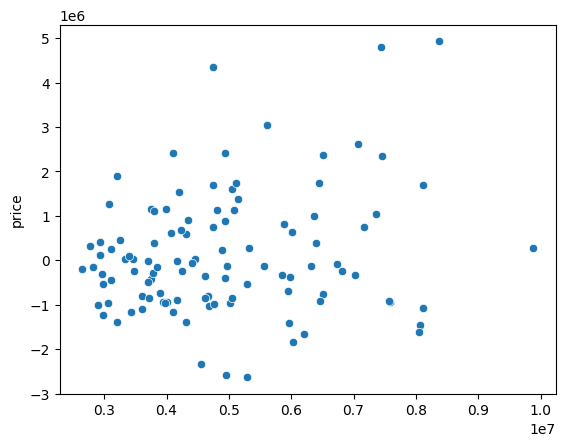

In [63]:
sns.scatterplot(x=y_pred,y=residuals)

 <img src="readme screenshot/ss1.png" height="300" width="500" />